# 1. Setup Mario

In [1]:
# Import the game
import gym_super_mario_bros
# Import the Joypad wrapper
from nes_py.wrappers import JoypadSpace
# Import the SIMPLIFIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [2]:
# Setup game
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [3]:
import torch
torch.cuda.is_available()

d:\Programing\Ananconda\envs\fai\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

# 2. Preprocess Environment

In [4]:
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt

In [5]:
# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# 2. Simplify the controls 
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)
# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])
# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

In [6]:
state = env.reset()

In [7]:
state, reward, done, info = env.step([5])

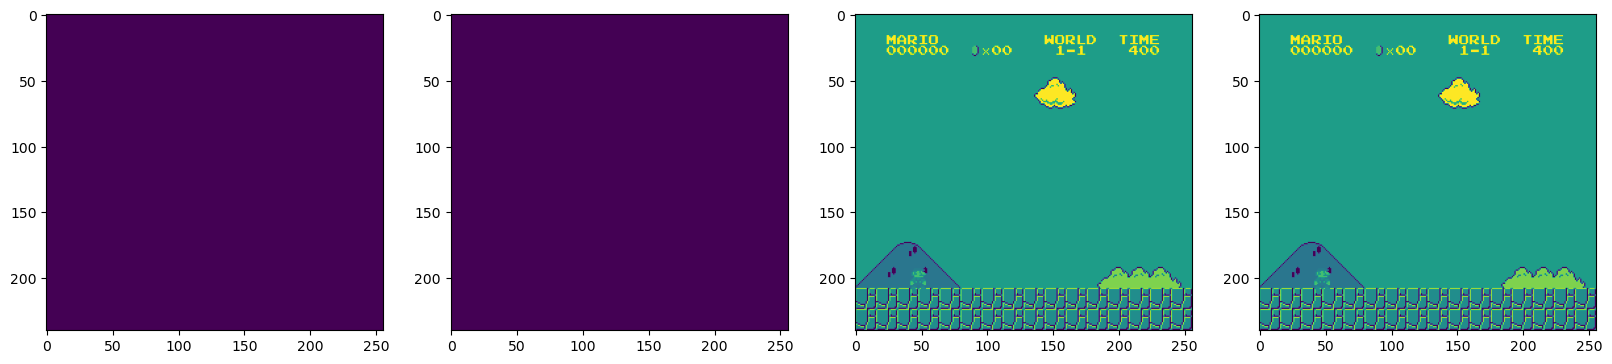

In [8]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

# 3. Train the RL Model

In [9]:
# Import os for file path management
import os 
# Import PPO for algos
from stable_baselines3 import PPO
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

In [10]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [11]:
CHECKPOINT_DIR = './trainPPO1/'
LOG_DIR = './logs/'

In [12]:
# Setup model saving callback
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

In [13]:
# This is the AI model started
model = PPO('CnnPolicy', env, verbose=1, learning_rate=0.000001, 
            n_steps=512) 

Using cuda device
Wrapping the env in a VecTransposeImage.


In [14]:
# Train the AI model, this is where the AI model starts to learn
model.learn(total_timesteps=5000000, callback=callback)

----------------------------
| time/              |     |
|    fps             | 61  |
|    iterations      | 1   |
|    time_elapsed    | 8   |
|    total_timesteps | 512 |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 51            |
|    iterations           | 2             |
|    time_elapsed         | 19            |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 5.8188336e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | 8.4e-05       |
|    learning_rate        | 1e-06         |
|    loss                 | 125           |
|    n_updates            | 10            |
|    policy_gradient_loss | -0.000377     |
|    value_loss           | 340           |
-------------------------------------------
-----

d:\Programing\Ananconda\envs\fai\lib\site-packages\stable_baselines3\common\save_util.py:276: UserWarning: Path 'train' does not exist. Will create it.
  warnings.warn(f"Path '{path.parent}' does not exist. Will create it.")


-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1114        |
|    time_elapsed         | 11507       |
|    total_timesteps      | 570368      |
| train/                  |             |
|    approx_kl            | 0.008731412 |
|    clip_fraction        | 0.0084      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.939      |
|    explained_variance   | 0.655       |
|    learning_rate        | 1e-06       |
|    loss                 | 96.6        |
|    n_updates            | 11130       |
|    policy_gradient_loss | -0.00449    |
|    value_loss           | 223         |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 49          |
|    iterations           | 1115        |
|    time_elapsed         | 11518       |
|    total_timesteps      | 570880

In [ ]:
model.save('thisisatestmodelPPO')